In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_excel("POsition_Salaries.xlsx")
df.head()

,Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000


In [3]:
df.tail()

,Level,Salary
5,6,150000
6,7,200000
7,8,300000
8,9,500000
9,10,1000000


In [4]:
df.corr()

,Level,Salary
Level,1.000000,0.817949
Salary,0.817949,1.000000


In [5]:
x = df[["Level"]]
y = df["Salary"]

In [6]:
from sklearn.preprocessing import PolynomialFeatures

In [7]:
pf = PolynomialFeatures(degree=2)
pf.fit(x)


PolynomialFeatures()

In [8]:
x = pf.transform(x)

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [12]:
lr.score(x_test,y_test)*100

76.66492889299867

In [13]:
#y = m1*1+m2x2^2+c
#y = -137634.60994912*x1+20502.04918033+x2^2-231288.51045788417  

In [14]:
lr.coef_

array([      0.        , -137634.60994912,   20502.04918033])

In [15]:
lr.intercept_

231288.51045788417

In [16]:
prd = lr.predict(x)

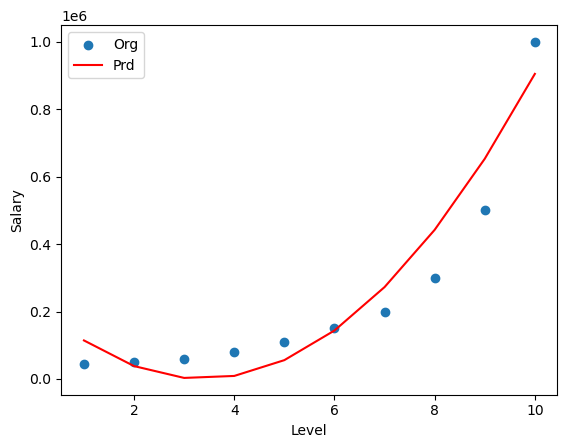

In [17]:
plt.scatter(df["Level"],df["Salary"])
plt.plot(df["Level"],prd,c="red")
plt.legend(["Org","Prd"])
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

In [19]:
test = pf.transform([[8]])
test

array([[ 1.,  8., 64.]])

In [20]:
lr.predict(test)

array([442342.77840588])